# PCA ANALYSIS

In this notebook, the Principal Component Analysis (PCA) is performed. With this dimensionality reduction technique we are able to reduce the dimension of the data, which in the case of a regional predictor for the sea-level-pressure fields, exceeds the thousands of variables... All the python code is hosted at `sscode/pca.py`, where we use the scikit-learn package available [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

Regarding the maths, an explanation of what PCA is can be found at [wikipedia](https://en.wikipedia.org/wiki/Principal_component_analysis), but it will be briefly explained here:

The PCA reduces the dimension of the data by means of a projection in a lower dimensional space that preserves the maximum variance of the sample data. The new vectors are formed by the ones where the projected data have the higher variance. Given the spatiotemporal variable ```{math} X_i (x, t_i)```, where ```{math} x ``` is the spatial data position of dimension ```{math} 3n1 + 2n2 ``` and ```{math} t_i ``` is the time, we apply PCA to obtain a new d-dimensional space. The eigenvectors [empirical orthogonal functions (EOFs)] of the covariance matrix of the data define the vectors of the new space. The idea of PCA is to find the minimum ```{math} d ``` linearly EOFs, so that the transformed components of the original data [principal components (PCs)] explain the maximum variance necessary in the problem at hand. The original data can be expressed as a linear combination of EOFs and PCs,

```{math}
X (x,t_i) = EOF_1(x)\times PC_1(t_i) + EOF_2(x)\times PC_2(t_i) + ... + EOF_d(x)\times PC_d(t_i)
```

Once we apply PCA, our data are defined by the principal components ```{math} X_i^{EOF}={PC_1,PC_2,...,PC_d}, i=1,...,P ```.

In [1]:
# basics
import os, sys

# append sscode to path
sys.path.insert(0, os.path.join(os.path.abspath(''), '..'))

# data viewer
from sscode.data import Loader, load_moana_hindcast_ss
from sscode.pca import PCA_DynamicPred
from sscode.config import default_region_reduced

# warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data
load_cfsr_moana_uhslc = Loader(
    data_to_load=['cfsr','moana','uhslc'], plot=False
)


 loading the sea-level-pressure fields... 


 loading daily resampled data... 


 loading the Moana v2 hindcast data... 


 loading and plotting the UHSLC tidal guages... 



## Regional PCs


 plotting 5 components with 2 EOFs + PC... 


 being the EOFs the slp, the gradient, in steps t, t-1 



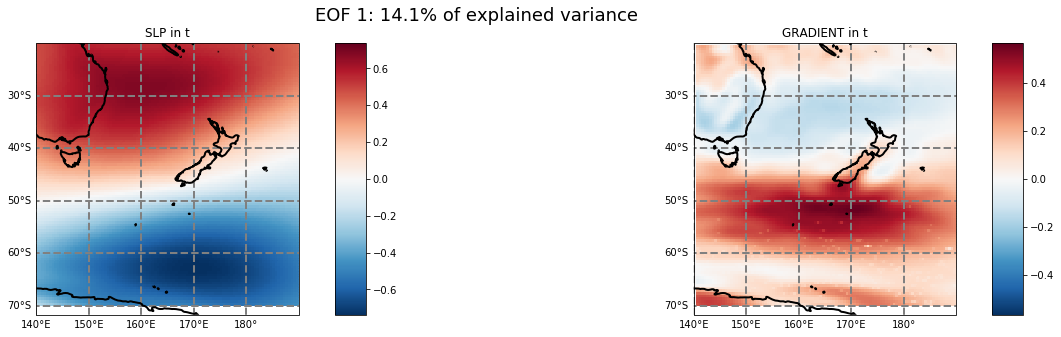

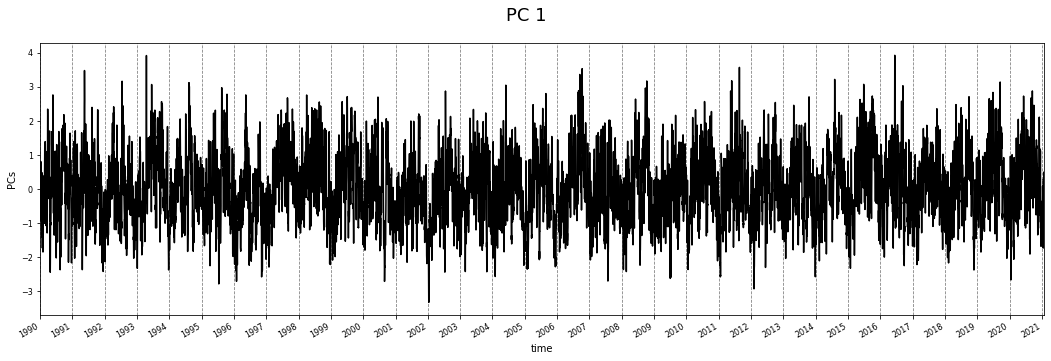

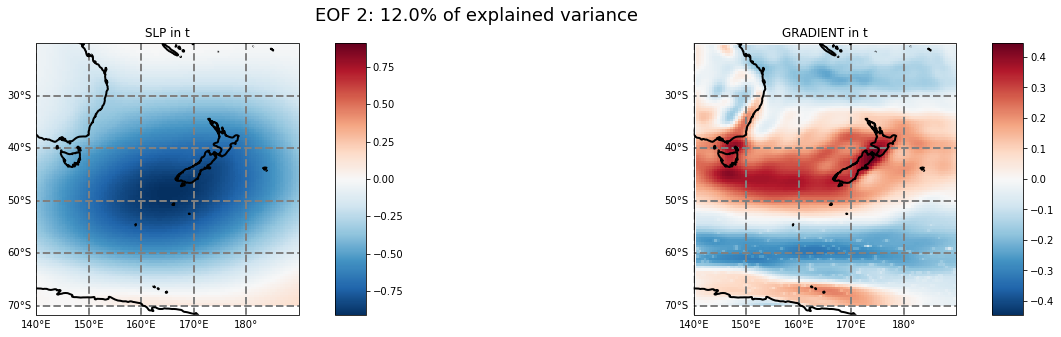

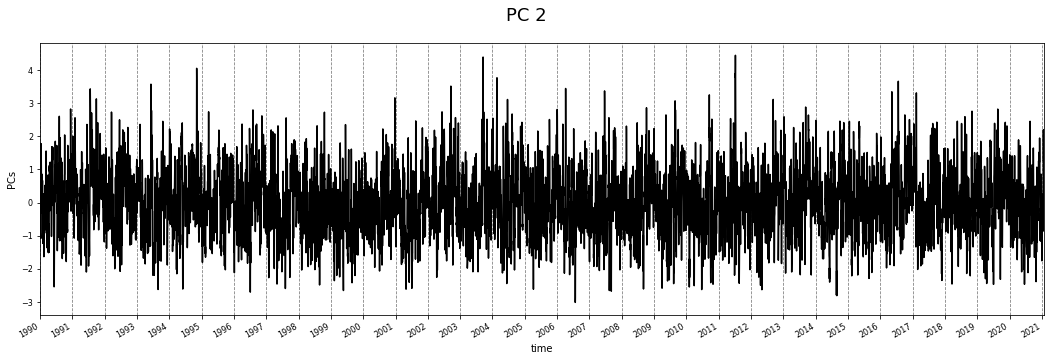

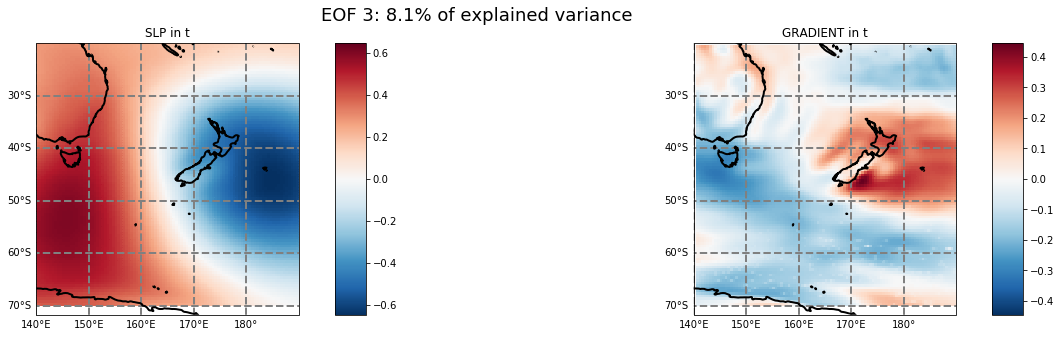

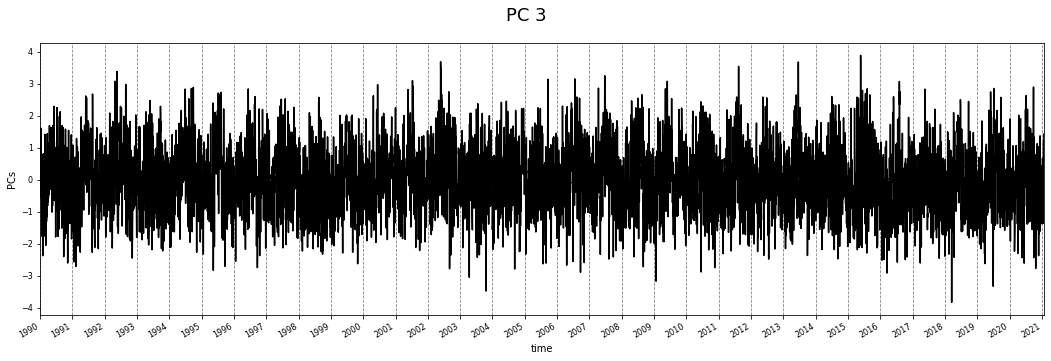

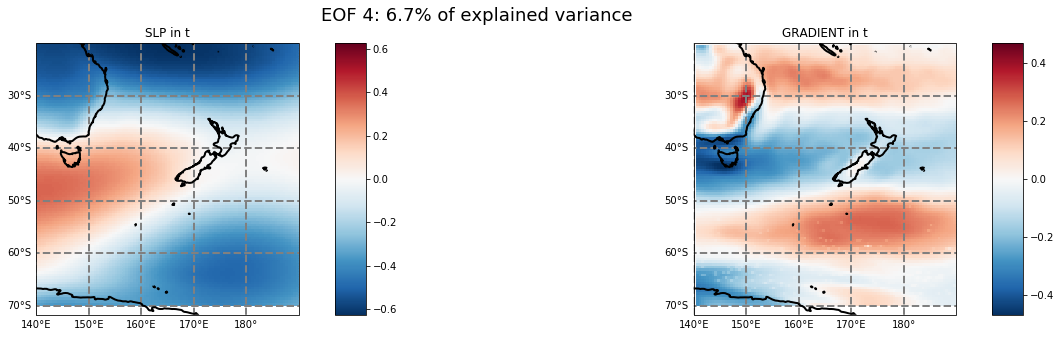

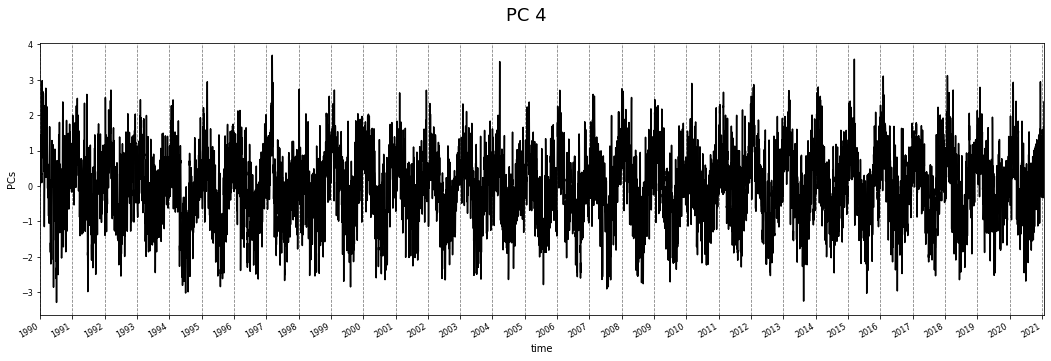

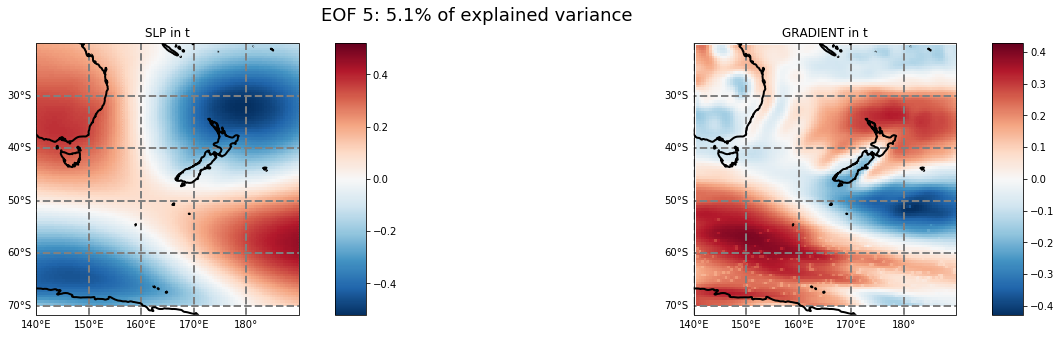

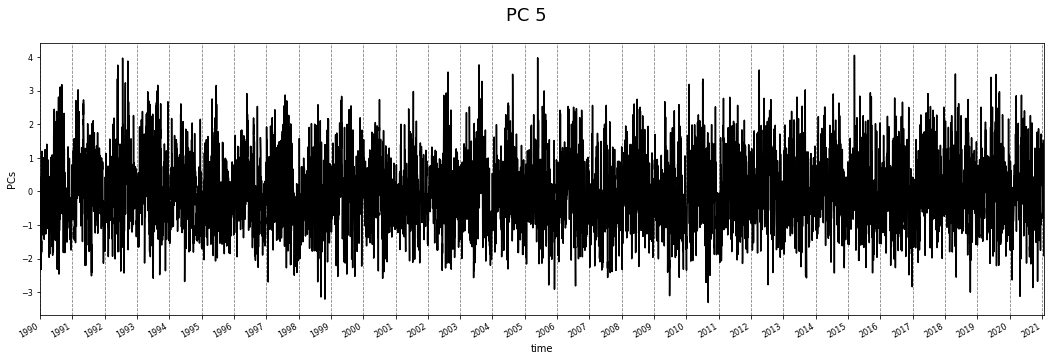

In [3]:
# load / calculate the regional pcs
if os.path.isfile('../data/cfsr/cfsr_regional_daily_pcs.nc'):
    import xarray as xr
    pcs_cfsr = xr.open_dataset(
        '../data/cfsr/cfsr_regional_daily_pcs.nc'
    )
    from sscode.plotting.pca import plot_pcs
    plot_pcs(pcs_cfsr,n_plot=5)

## Local-regional PCs (with gradient)


 lets calculate the PCs... 


 calculating the gradient of the sea-level-pressure fields... 


 pressure/gradient predictor both with shape: 
 (11354, 25, 25) 


 calculated PCs matrix with shape: 
 (11353, 1250) 


 plotting 2 components with 2 EOFs + PC... 


 being the EOFs the slp, the gradient, in steps t, t-1 



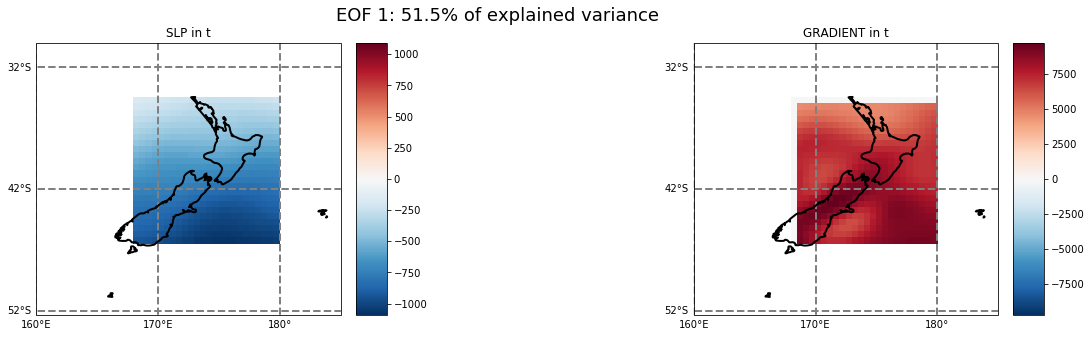

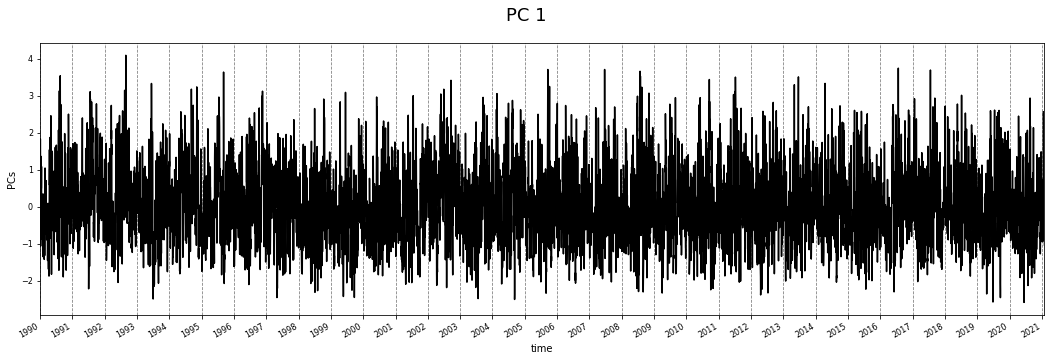

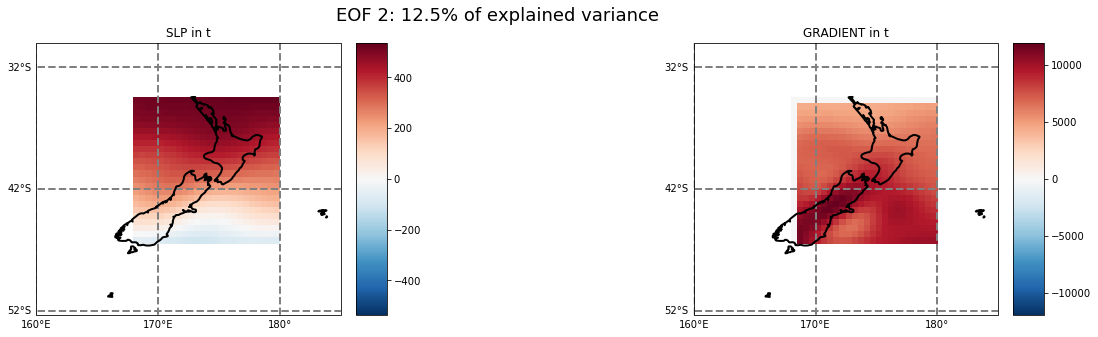

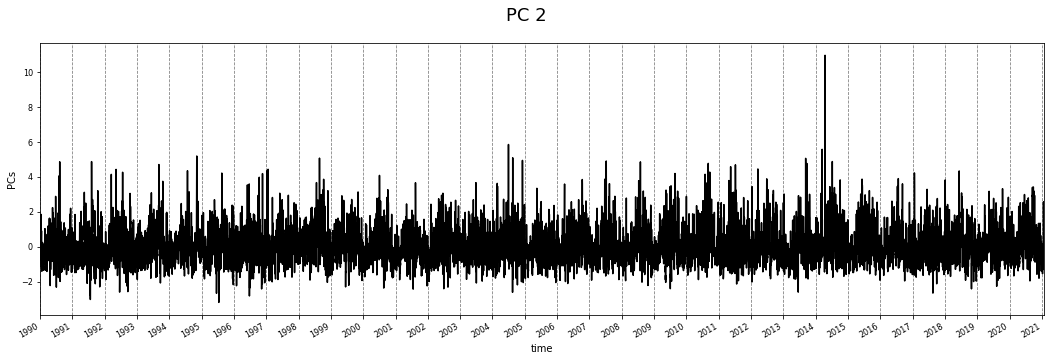


 plotting reconstruction of 2 EOFs... 


 being the EOFs the slp, the gradient, in steps t, t-1... 



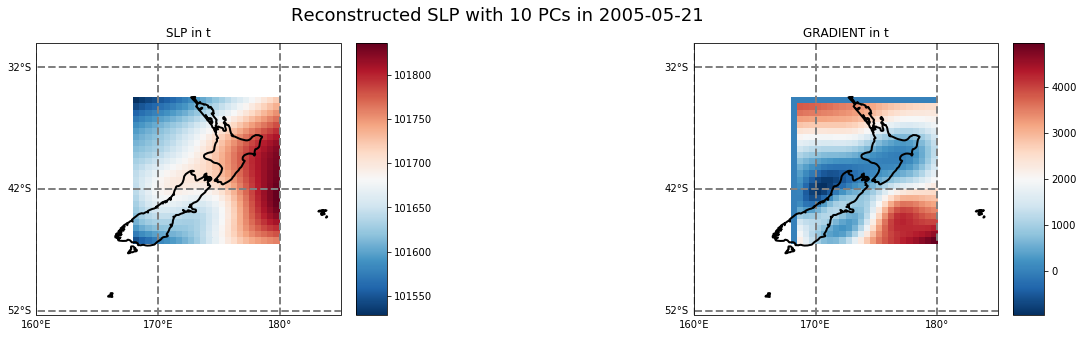

In [4]:
# calculate some local pcs
pcs_data, pcs_scaler = PCA_DynamicPred(
    load_cfsr_moana_uhslc.predictor_slp, 
    calculate_gradient=True, time_lapse=1,
    region=(True,(
        load_cfsr_moana_uhslc.location[0]-6.1,
        load_cfsr_moana_uhslc.location[0]+6.1,
        load_cfsr_moana_uhslc.location[1]+6.1,
        load_cfsr_moana_uhslc.location[1]-6.1
    )),
    pca_plot=(True,True) # (plot,scale)
)
if True:
    from sscode.plotting.pca import plot_recon_pcs
    recon_slp = plot_recon_pcs(
        pcs_data, pcs_scaler,
        region=default_region_reduced,
        return_slp=True
    )

## Local PCs (with wind and gradient)


 lets calculate the PCs... 


 adding the wind to the predictor... 


 winds predictor with shape: 
 (11354, 11, 11) 


 calculating the gradient of the sea-level-pressure fields... 


 pressure/gradient predictor both with shape: 
 (11354, 11, 11) 


 calculated PCs matrix with shape: 
 (11353, 363) 


 plotting 2 components with 3 EOFs + PC... 


 being the EOFs the slp, the gradient, in steps t, t-1 



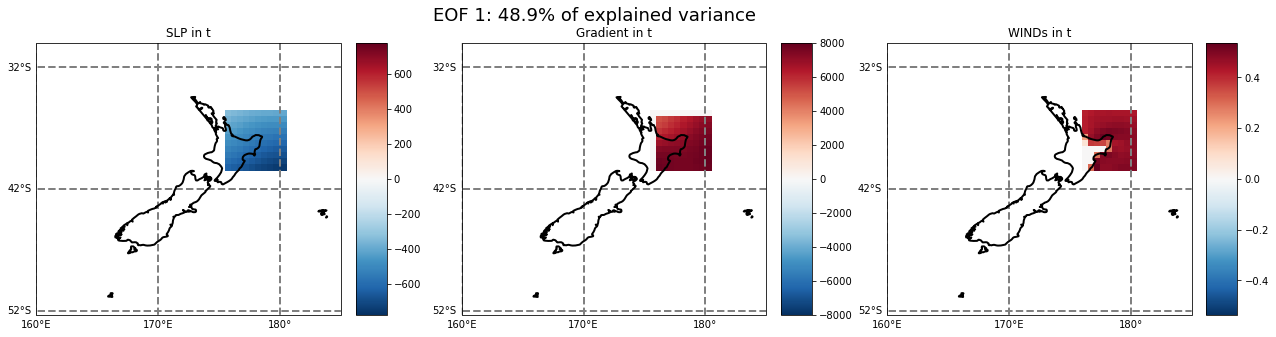

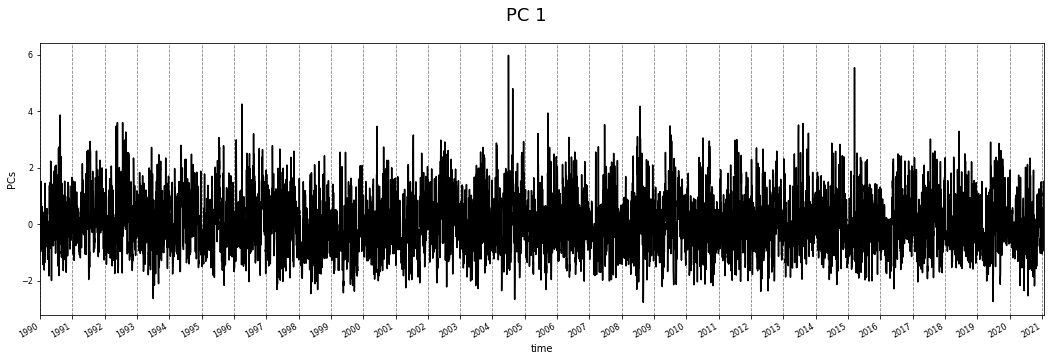

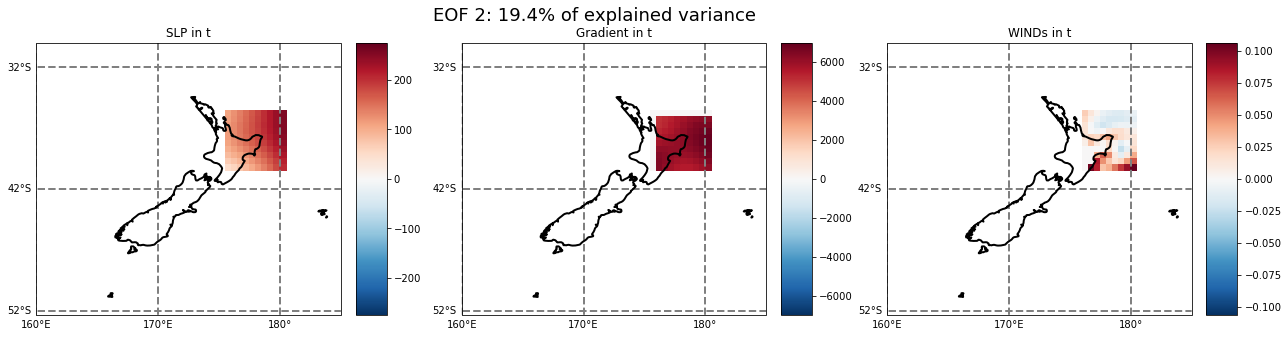

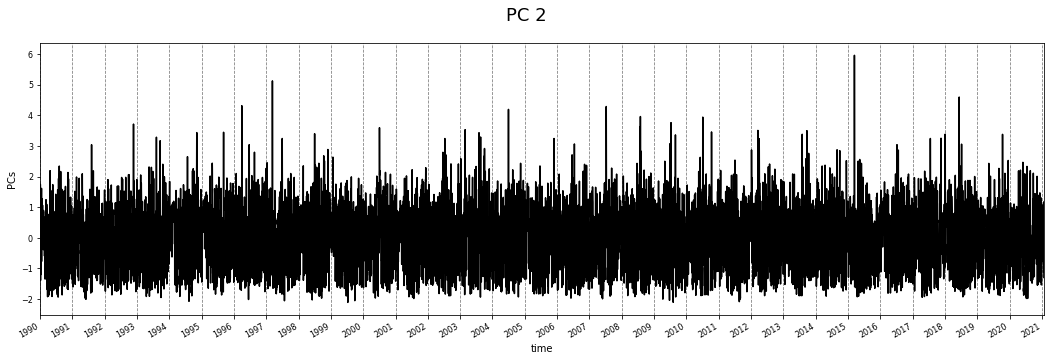

(<xarray.Dataset>
 Dimensions:   (n_components: 363, n_features: 363, n_lat: 11, n_lon: 11, time: 11353)
 Coordinates:
   * time      (time) datetime64[ns] 1990-01-01 1990-01-02 ... 2021-01-30
 Dimensions without coordinates: n_components, n_features, n_lat, n_lon
 Data variables:
     PCs       (time, n_components) float64 -7.43 4.781 ... 2.259e-18 1.382e-19
     EOFs      (n_components, n_features) float64 -0.07382 -0.07481 ... 0.0 0.0
     variance  (n_components) float64 138.3 54.97 42.0 ... 8.679e-35 5.777e-36
     pcs_lon   (n_lon) float32 175.5 176.0 176.5 177.0 ... 179.5 180.0 180.5
     pcs_lat   (n_lat) float32 -35.5 -36.0 -36.5 -37.0 ... -39.5 -40.0 -40.5,
 StandardScaler())

In [9]:
# more pcs in new location
new_location = (178,-38)
PCA_DynamicPred(
    load_cfsr_moana_uhslc.predictor_slp, 
    calculate_gradient=True, time_lapse=1,
    region=(True,(
        new_location[0]-2.6,new_location[0]+2.6,
        new_location[1]+2.6,new_location[1]-2.6
    )),
    winds=(True,load_cfsr_moana_uhslc.predictor_wind),
    wind_vars=('wind_proj_mask','lon','lat'),
    pca_plot=(True,True),
    pca_ttls=['SLP in t','Gradient in t','WINDs in t']
)

## Local PCs (just SLP with time lapse)


 lets calculate the PCs... 


 calculated PCs matrix with shape: 
 (11351, 363) 


 plotting 2 components with 3 EOFs + PC... 


 being the EOFs the slp, the gradient, in steps t, t-1 



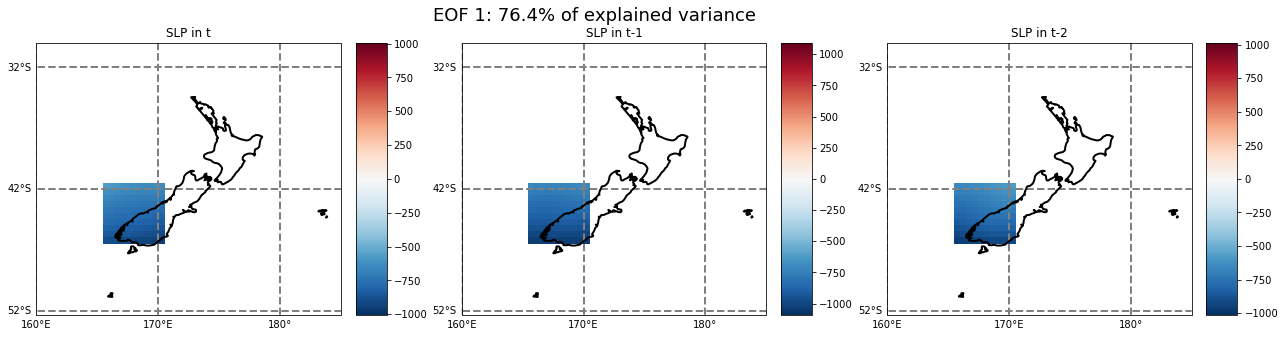

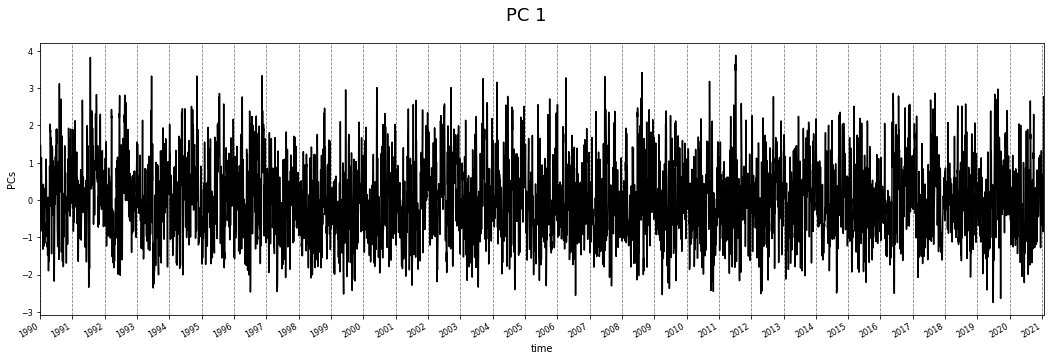

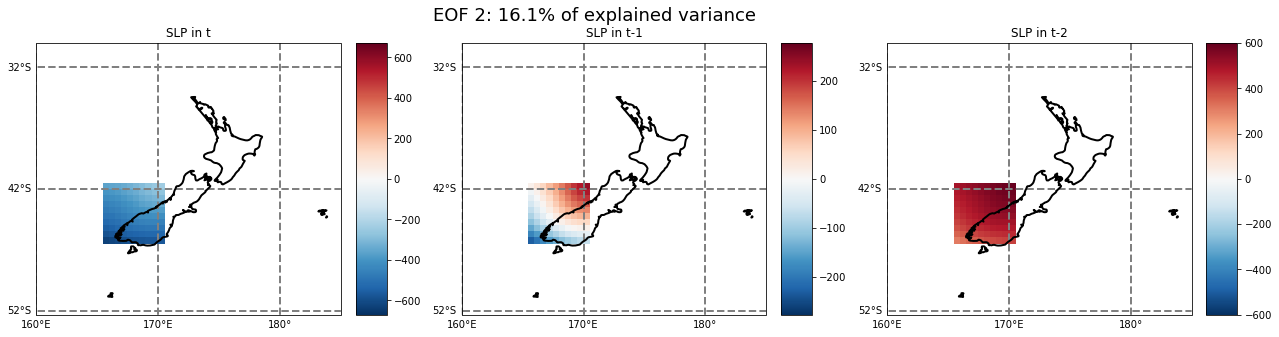

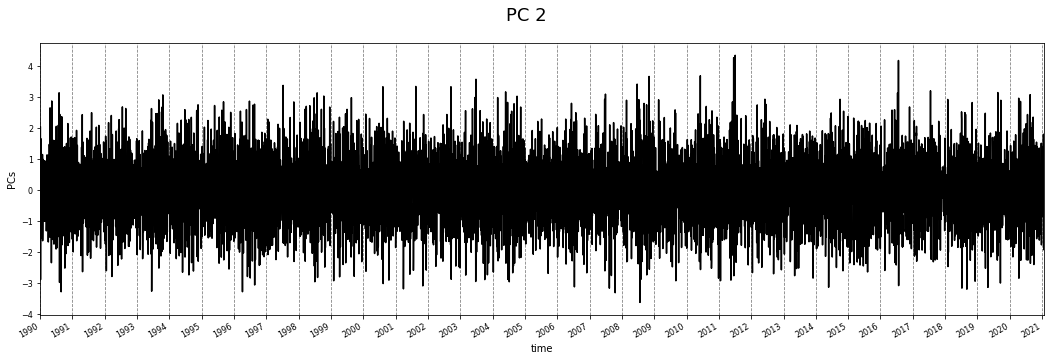

(<xarray.Dataset>
 Dimensions:   (n_components: 363, n_features: 363, n_lat: 11, n_lon: 11, time: 11351)
 Coordinates:
   * time      (time) datetime64[ns] 1990-01-01 1990-01-02 ... 2021-01-28
 Dimensions without coordinates: n_components, n_features, n_lat, n_lon
 Data variables:
     PCs       (time, n_components) float64 -13.78 7.049 ... -1.227e-05
     EOFs      (n_components, n_features) float64 -0.04578 -0.04671 ... -0.02585
     variance  (n_components) float64 277.5 58.57 12.06 ... 2.702e-11 2.656e-11
     pcs_lon   (n_lon) float32 165.5 166.0 166.5 167.0 ... 169.5 170.0 170.5
     pcs_lat   (n_lat) float32 -41.5 -42.0 -42.5 -43.0 ... -45.5 -46.0 -46.5,
 StandardScaler())

In [10]:
# more pcs with time lapse
new_location = (168,-44)
PCA_DynamicPred(
    load_cfsr_moana_uhslc.predictor_slp, 
    calculate_gradient=False, time_lapse=3,
    region=(True,(
        new_location[0]-2.6,new_location[0]+2.6,
        new_location[1]+2.6,new_location[1]-2.6
    )),
    pca_plot=(True,True),
    pca_ttls=['SLP in t','SLP in t-1','SLP in t-2']
)

## Storm-Surge PCs


 loading the Moana v2 hindcast data (ss)... 


 lets calculate the PCs... 


 calculated PCs matrix with shape: 
 (8065, 4032) 


 plotting 2 components with 2 EOFs + PC... 


 being the EOFs the slp, the gradient, in steps t, t-1 



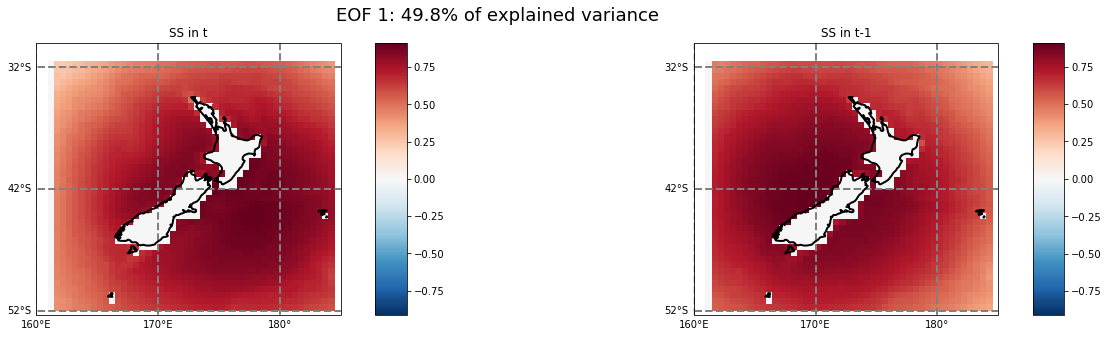

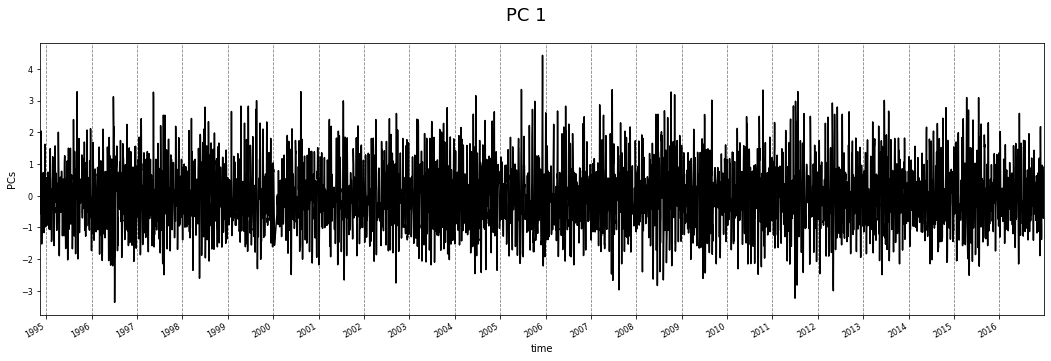

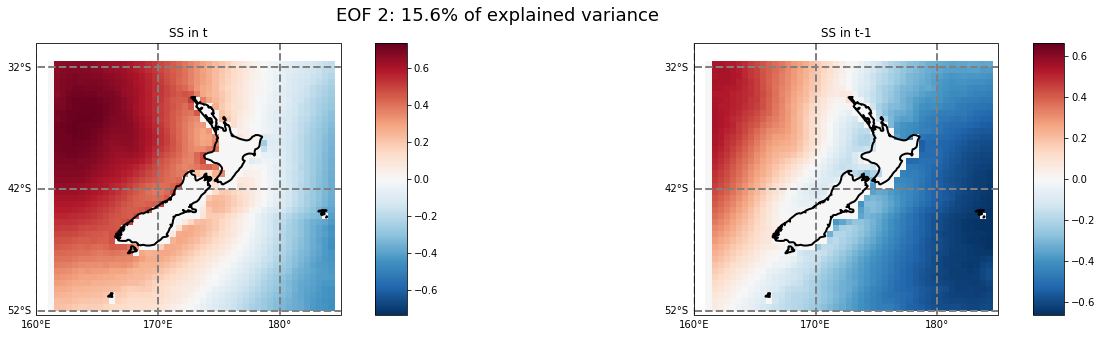

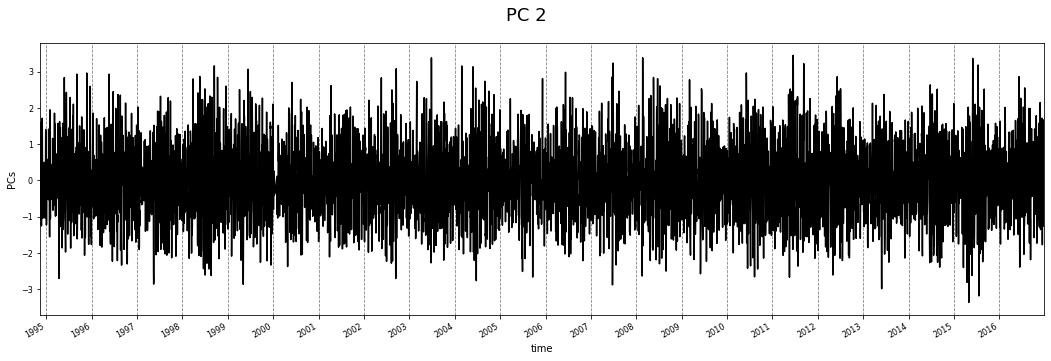

In [7]:
# calculate the pcs of the storm surge
interp_ss = True
if interp_ss:
    import numpy as np
    from sscode.config import default_region_reduced
    pcs_ss, ss_scaler = PCA_DynamicPred(
        load_moana_hindcast_ss(daily=True).interp(
            lon=np.arange(161,185,0.5),
            lat=np.arange(-52,-31,0.5)
        ).sortby('lat',ascending=False),
        pres_vars=('ss','lon','lat'),
        time_resample='1D', time_lapse=2,
        region=(True,default_region_reduced), 
        pca_plot=(True,False),
        pca_ttls=['SS in t', 'SS in t-1']
    )